##__Example 1:  Generate a 1-dimensional feature and target for linear regression using make_regression__

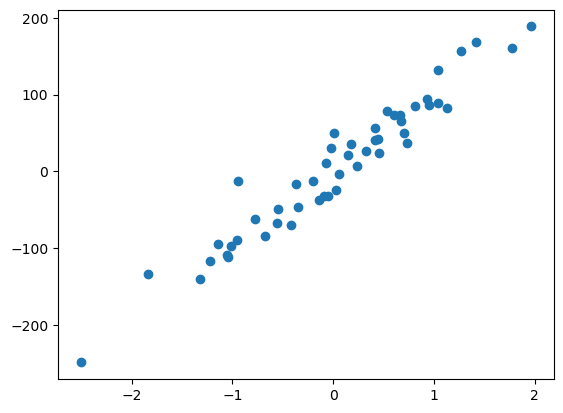

In [6]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
x,y=make_regression(n_samples=50,n_features=1,noise=20,random_state=23)
plt.scatter(x,y)
plt.show()

__DATA PREPROCESSING__

In [13]:
#Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Step 2: Load the dataset
df=pd.read_csv('diabetes.csv')
print(df.head())
print('-----------------------------------------------------------------------')
print(df.isnull().sum())
print('-----------------------------------------------------------------------')
print(df.info())
print('-----------------------------------------------------------------------')
print(df.shape)

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
-----------------------------------------------------------------------
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [14]:
#Step 3: Statistical Analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


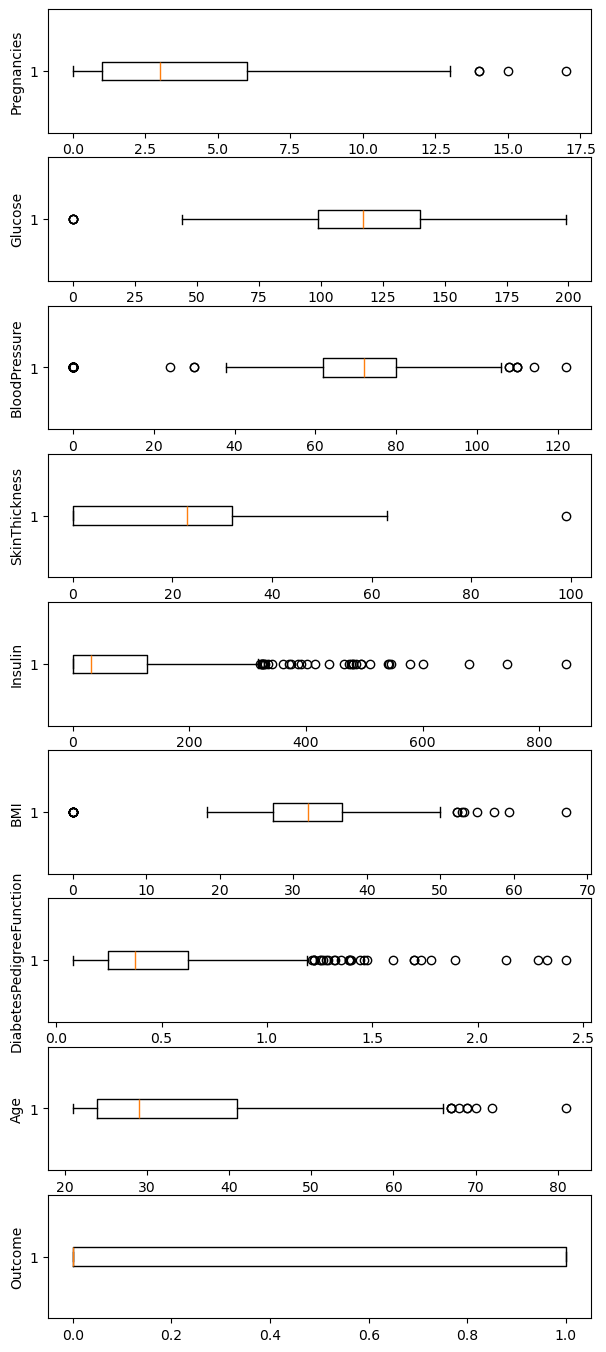

In [31]:
#The above table shows the count, mean, standard deviation, min, 25%, 50%, 75%, and max values for each column. 
#When we carefully observe the table we will find that. Insulin, Pregnancies, BMI, BloodPressure columns has outliers. 

#Let’s plot the boxplot for each column for easy understanding.
#Step 4: Check the outliers:

fig,axs=plt.subplots(9,1,figsize=(7,17))  #9 rows 1 column
i=0
for col in df.columns:
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [38]:
##need to drop outliers
##Pregnancies
#identify quartile
q1,q3=np.percentile(df['Pregnancies'],[25,75])
iqr= q3-q1
Low_bound= q1 - (1.5*iqr)
upp_bound= q3 + (1.5*iqr)
clean_data = df[(df['Pregnancies'] >= Low_bound) & (df['Pregnancies'] <= upp_bound)]

q1,q3=np.percentile(df['Glucose'],[25,75])
iqr= q3-q1
Low_bound= q1 - (1.5*iqr)
upp_bound= q3 + (1.5*iqr)
clean_data = clean_data[(clean_data['Glucose'] >= Low_bound) & (clean_data['Glucose'] <= upp_bound)]

q1,q3=np.percentile(df['BloodPressure'],[25,75])
iqr= q3-q1
Low_bound= q1 - (1.5*iqr)
upp_bound= q3 + (1.5*iqr)
clean_data = clean_data[(clean_data['BloodPressure'] >= Low_bound) & (clean_data['BloodPressure'] <= upp_bound)]

q1,q3=np.percentile(df['SkinThickness'],[25,75])
iqr= q3-q1
Low_bound= q1 - (1.5*iqr)
upp_bound= q3 + (1.5*iqr)
clean_data = clean_data[(clean_data['SkinThickness'] >= Low_bound) & (clean_data['SkinThickness'] <= upp_bound)]

q1,q3=np.percentile(df['Insulin'],[25,75])
iqr= q3-q1
Low_bound= q1 - (1.5*iqr)
upp_bound= q3 + (1.5*iqr)
clean_data = clean_data[(clean_data['Insulin'] >= Low_bound) & (clean_data['Insulin'] <= upp_bound)]

q1,q3=np.percentile(df['BMI'],[25,75])
iqr= q3-q1
Low_bound= q1 - (1.5*iqr)
upp_bound= q3 + (1.5*iqr)
clean_data = clean_data[(clean_data['BMI'] >= Low_bound) & (clean_data['BMI'] <= upp_bound)]

q1,q3=np.percentile(df['DiabetesPedigreeFunction'],[25,75])
iqr= q3-q1
Low_bound= q1 - (1.5*iqr)
upp_bound= q3 + (1.5*iqr)
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= Low_bound) & (clean_data['DiabetesPedigreeFunction'] <= upp_bound)]

q1,q3=np.percentile(df['Age'],[25,75])
iqr= q3-q1
Low_bound= q1 - (1.5*iqr)
upp_bound= q3 + (1.5*iqr)
clean_data = clean_data[(clean_data['Age'] >= Low_bound) & (clean_data['Age'] <= upp_bound)]

# print(Low_bound)
# print(upp_bound)


In [39]:
 clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


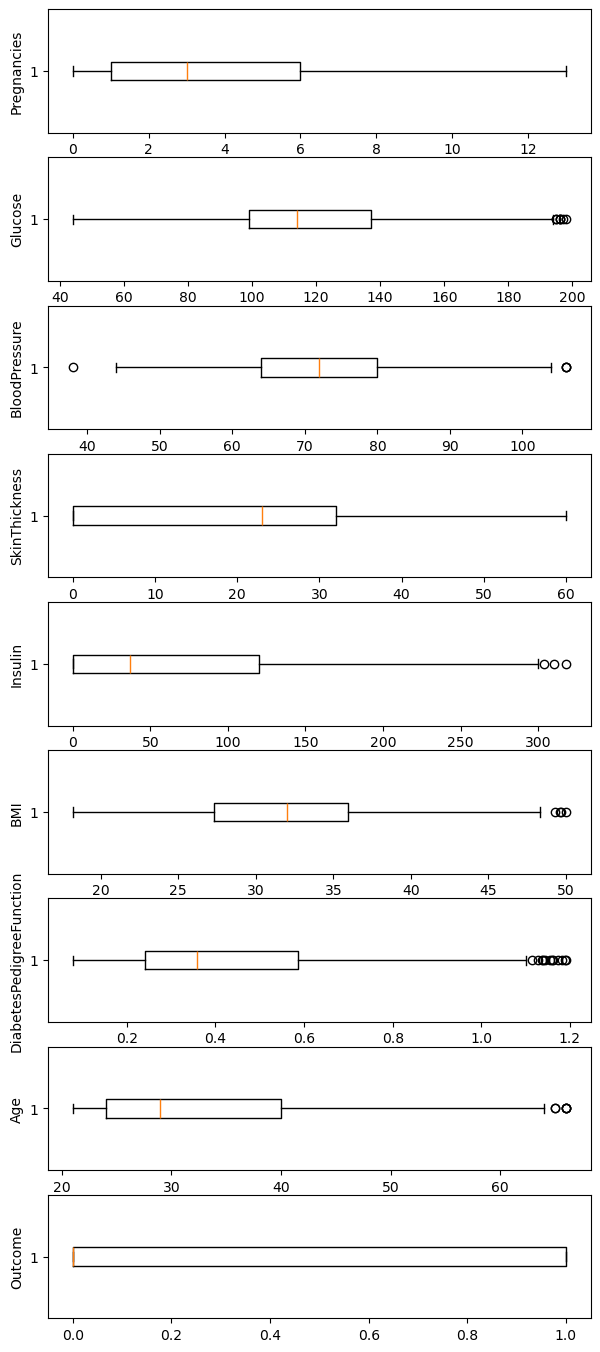

In [41]:
fig,axs=plt.subplots(9,1,figsize=(7,17))  #9 rows 1 column
i=0
for col in clean_data.columns:
    axs[i].boxplot(clean_data[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

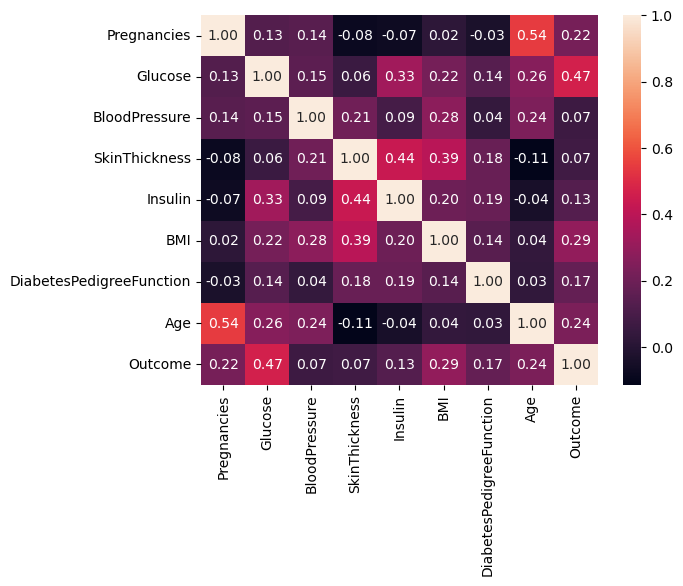

In [43]:
##Step 5: Correlation
cor = df.corr()
sns.heatmap(cor,annot=True,fmt='.2f')
plt.show()

In [46]:
cor['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [49]:
#Step 6: Separate independent features and Target Variables
x=df.drop(columns=['Outcome'])
y=df.Outcome

In [50]:
##MinMaxScaler - scales data in range of [0,1]
#Normalization
scaler=MinMaxScaler(feature_range=(0,1))
rescalingX=scaler.fit_transform(x)
rescalingX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [97]:
df=pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
df.shape

(418, 12)

In [99]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [101]:
df.duplicated().sum()

0

In [102]:
df1=df.drop(columns='Cabin')
df1.dropna(subset=['Embarked'], axis=0, inplace=True) 

In [103]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [104]:
df1.shape

(418, 11)

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [109]:
df2=df1.fillna(df1.Age.mean())
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [92]:
df1 = df.drop(columns=['Name','Ticket']) 
df1.shape


(91, 10)

In [93]:
round((df1.isnull().sum()/df1.shape[0])*100,2)


PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            4.4
SibSp          0.0
Parch          0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

##__SMOTE - Synthetic Minority Oversampling Technique :It aims to balance class distribution by randomly increasing minority class__


##__IMBALANCED DATA DISTRIBUTION : happens when observations in one of the class are much higher or lower than the other classes.__

In [110]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [112]:
df.shape

(284807, 31)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [116]:
df=df.drop(['Time','Amount'],axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [118]:
df['Class'].value_counts()  #492 fraud transactions. 

Class
0    284315
1       492
Name: count, dtype: int64

In [163]:
#Split the data into test and train sets
from sklearn.model_selection import train_test_split

x=df.iloc[:,0:27]

y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [164]:

# describes info about train and test set 
print("Number transactions X_train dataset: ", x_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", x_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 27)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 27)
Number transactions y_test dataset:  (85443,)


In [165]:
print(x)
print(y)

               V1         V2        V3  ...       V25       V26       V27
0       -1.359807  -0.072781  2.536347  ...  0.128539 -0.189115  0.133558
1        1.191857   0.266151  0.166480  ...  0.167170  0.125895 -0.008983
2       -1.358354  -1.340163  1.773209  ... -0.327642 -0.139097 -0.055353
3       -0.966272  -0.185226  1.792993  ...  0.647376 -0.221929  0.062723
4       -1.158233   0.877737  1.548718  ... -0.206010  0.502292  0.219422
...           ...        ...       ...  ...       ...       ...       ...
284802 -11.881118  10.071785 -9.834783  ...  1.436807  0.250034  0.943651
284803  -0.732789  -0.055080  2.035030  ... -0.606624 -0.395255  0.068472
284804   1.919565  -0.301254 -3.249640  ...  0.265745 -0.087371  0.004455
284805  -0.240440   0.530483  0.702510  ... -0.569159  0.546668  0.108821
284806  -0.533413  -0.189733  0.703337  ... -0.473649 -0.818267 -0.002415

[284807 rows x 27 columns]
0         0
1         0
2         0
3         0
4         0
         ..
284802    0


In [166]:
##Now train the model without handling the imbalanced class distribution

In [168]:
lr=LogisticRegression()
lr.fit(x_train,y_train.ravel())  #ravel converts multi-dim to 1-dim
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.63      0.74       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [172]:
#Using SMOTE Algorithm
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_t,y_t=sm.fit_resample(x_train,y_train.ravel())
lr1 = LogisticRegression() 
lr1.fit(x_t, y_t.ravel()) 
predictions = lr1.predict(x_test) 

# print classification report 
print(classification_report(y_test, predictions)) 
#SMOTE Algorithm has oversampled the minority instances and made it equal to majority class

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



##__Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.__

In [184]:
iris=pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [188]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [189]:
from sklearn import preprocessing 
pp=preprocessing.LabelEncoder()
iris['species']=pp.fit_transform(iris['species'])
iris['species'].unique()

array([0, 1, 2])

In [191]:
#There may be bias in Label encoding inorder solve this One Hot Encoding can be used
one_hot_encoded_data = pd.get_dummies(iris, columns = ['species'])
print(one_hot_encoded_data)

     sepal_length  sepal_width  petal_length  ...  species_0  species_1  species_2
0             5.1          3.5           1.4  ...       True      False      False
1             4.9          3.0           1.4  ...       True      False      False
2             4.7          3.2           1.3  ...       True      False      False
3             4.6          3.1           1.5  ...       True      False      False
4             5.0          3.6           1.4  ...       True      False      False
..            ...          ...           ...  ...        ...        ...        ...
145           6.7          3.0           5.2  ...      False      False       True
146           6.3          2.5           5.0  ...      False      False       True
147           6.5          3.0           5.2  ...      False      False       True
148           6.2          3.4           5.4  ...      False      False       True
149           5.9          3.0           5.1  ...      False      False       True

[15